<a href="https://colab.research.google.com/github/m-dsouza/covid-vaccination-portal/blob/main/InfoVis_HW1_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS-GY 6313/CUSP-GX 6006 Information Assignment 1

Given: Two triangle positions in 3D, triangle colors, and camera parameters. 

Output: Saved and visualizable color images from the three given cameras (as .png, .jpg, etc.)

##Inputs:

3D Coordinates of the vertices two triangles (vertices1, vertices2, vertices3)

```
tri1_vertices = [(x0, y0, z0), (x1, y1, z1), (x2, y2, z2)]
tri2_vertices = [(x0, y0, z0), (x1, y1, z1), (x2, y2, z2)] 
```
Camera parameters (position, forward/facing direction, up/camera orientation, fov). Assume aspect ratio is 1:1 and FOV in degrees.
```
cam1 = [(x0, y0, z0), (x0_f, y0_f, z0_f), (x0_u, y0_u, z0_u), fov0]
cam2 = [(x1, y1, z1), (x1_f, y1_f, z1_f), (x1_u, y1_u, z1_u), fov1]
cam3 = [(x2, y2, z2), (x2_f, y2_f, z2_f), (x2_u, y2_u, z2_u), fov2]
```



Changelog: 

9/29: Fixed a variable typo in scale_by_2_matrix to 2/(t-b), orginally 2/(l-b) 

# Programming exercises

In [ ]:
from google.colab import drive
from google.colab import files
import matplotlib.pyplot as plt 
import numpy as np

drive.mount('/content/drive')

Mounted at /content/drive


## Render triangles in camera using CPU-only rasterisation.


Write a function to render an image using camera settings and triangle vertices as the input. Write your own code for rasterization to render a triangle pixel-by-pixel. You can use any method to show the triangles (ex. Matplotlib, OpenCV, plotly, etc.) as long as you first perform Model-View-Projection.






# Complete the functions for Model View Projection

Model: objects to coordinates in world space

View: from world space to camera space

Projection: from camera space to clip/screen space

In [ ]:
# Since our triangle vertices are already in world space (x, y, z), there's
# no need write a function for the Model part of MVP! We can jump directly to 
# getting the view matrix and using that to get the camera coordinates.

In [ ]:
def view(camera, triangle1, triangle2):
  ### TODO: Find R_view and T_view using the camera settings

  M_view = np.matmul(R_view, T_view)
  ### TODO: Use M_view to find the verticees coordinates in camera space

  tri1_in_camera_space = [(0, 0, 0), (0, 0, 0), (0, 0, 0)] # Find
  tri2_in_camera_space = [(0, 0, 0), (0, 0, 0), (0, 0, 0)] # Find
  return tri1_in_camera_space, tri2_in_camera_space

In [ ]:
def get_M_persp(field_of_view):
  aspect_ratio = 1
  ### TODO: Define r, l, b, t, n, and f. Return M_persp
  r = 0
  l = 0
  b = 0
  t = 0
  n = 0 # You can choose some very small number
  f = 0 # You can choose some very large number

  scale_by_2 = [[2/(r-l), 0, 0, 0], 
               [0, 2/(t-b), 0 , 0],
               [0, 0, 2/(n-f), 0],
               [0, 0, 0, 1]]

  translate_center_to_origin = [[1, 0, 0, -(r+l)/2],
                                [0, 1, 0, -(t+b)/2],
                                [0, 0, 1, -(n+f)/2],
                                [0, 0, 1, 0]]

  M_ortho = np.matmul(scale_by_2, translate_center_to_origin)

  ### TODO: Find M_persp
  M_persp = [[],
             [],
             [],
             []]

  return M_persp

def perspective_projection(field_of_view, tri1, tri2):
  M_persp = get_M_persp(field_of_view)
  ### TODO: Use M_persp to find the verticees coordinates in camera space
  
  tri_1_screen_coordinates = [(0, 0), (0, 0), (0, 0)] 
  tri_2_screen_coordinates = [(0, 0), (0, 0), (0, 0)] 
  return tri_1_screen_coordinates, tri2_screen_coordinates

In [ ]:
def mvp(camera, triangle1, triangle2):
  tri1_in_camera_space, tri2_in_camera_space = view(camera)
  tri1_in_screen_space, tri2_in_screen_space = perspective_projection(camera[3], tri1_in_camera_space, tri2_in_camera_space)
  return tri1_in_screen_space, tri2_in_screen_space

In [ ]:
def rasterize(tri1, tri2):
  pixels = np.zeros(shape = (100, 100, 3)) # 100x100 matrix of RGB values 
  
  # The matrix format is [row][col], or [y][x], so color the pixels accordingly.
  ### TODO: Draw the triangles

  return pixels

### TODO: Write a function for Supersampling (call after image is rasterized)
def anti_aliasing(pixels):
  return pixels

### TODO: Complete the Z_buffer algorithm for occlusion
def z_buffer(pixels):
  return pixels

In [ ]:
# Triangle vertices in 3D world space
tri1 = [(0, 0, 0), (0, 30, 0), (35, 0, 35)] # RGB(255, 0, 0), Red
tri2 = [(17, 0, 0), (0, 0, 17), (17, 45, 17)] # RGB(0, 255, 0), Green

# cam = [(x, y, z), (x_f, y_f, z_f), (x_u, y_u, z_u), fov]
# The first coordinate is where the camera is in world space. The second is what
# coordinate it is looking at/facing. The third represents the "up" axis.  
# Ex. cam1, cam3 up = positive of y-axis. cam2 up = negative if y-axis (upside-down camera)
cam1 = [(50, 10, 0), (0, 10, 0), (0, 1, 0), 90] 
cam2 = [(50, 10, 0), (0, 10, 0), (0, -1, 0), 105]
cam3 = [(0, 10, 60), (0, 10, 0), (0, 1, 0), 120] 

perspective1_tri1, perspective1_tri2 = mvp(cam1, tri1, tri2)
perspective2_tri1, perspective2_tri2 = mvp(cam2, tri1, tri2)
perspective3_tri1, perspective3_tri2 = mvp(cam3, tri1, tri2)

# Draw triangles in 2D
rasterize(perspective1_tri1, perspective1_tri2) 
rasterize(perspective2_tri1, perspective2_tri2)
rasterize(perspective3_tri1, perspective3_tri2)

### TODO: antialiasing and occlusion

# Replace with finished 100x100 matrix (row, column = y, x of pixels)
perspective1 = np.zeros(shape = (100, 100, 3)) 
perspective2 = np.zeros(shape = (100, 100, 3))
perspective3 = np.zeros(shape = (100, 100, 3))


Save the 100x100x3 RGB images you rendered with the given camera settings and triangle vertices. Images can be displayed using MatplotLib.

In [ ]:
# Save and view images
# origin = "lower" sets origin of plot to bottom left
plt.imshow(perspective1, origin="lower") 
plt.show()
plt.savefig('perspective1.png')
files.download("perspective1.png") 
plt.imshow(perspective2, origin="lower") 
plt.show()
plt.savefig('perspective2.png')
files.download("perspective2.png") 
plt.imshow(perspective3, origin="lower") 
plt.show()
plt.savefig('perspective3.png')
files.download("perspective3.png") 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


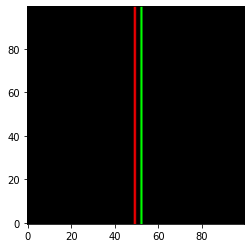

In [ ]:
# Example of how to plot an image with a red line at X = 49.
# Note that row = y, column = x value of pixel
example_image = np.zeros(shape = (100, 100, 3))
for row in range(100):
  example_image[row][49] = [255, 0, 0]
  example_image[row][52] = [0, 255, 0]
plt.imshow(example_image, origin="lower")
plt.show()

# Submission details

Click "File" > "Save a Copy in Drive" and rename the file to your netID followed by "_InfoVisHW1." Ex. "bsl334_InfoVisHW1.ipynb"

You will be submitting your Colab notebook along with your three camera perspective images. 



Grading

```
Single triangle with MVP (50%)
Single triangle with MVP and anti-aliasing (75%)
Two triangles with MVP, anti-aliasing, and occlusion (100%) 
```